# **Project Title: Hospital Length of Stay Cost Forecasting**
### Team 9: Rebecca Bubis, Sanjal Desai, Crystal Leatvanich, and Courtney Vincent
Link to Colab File: https://colab.research.google.com/drive/1c5--HnCSMKP0aQN1dhM0JC2RFOgsGLeM?usp=sharing

# Introduction

## Problem Statement
Hospitals often struggle to accurately predict the costs associated with patient length of stay due to a variety of factors including demographic, medical, and financial variables. This project aims to identify the key drivers of this relationship and develop a predictive model that forecasts hospitalization costs based on both length of stay and patient-specific features.

### Data Source:

* Name: Hospital Inpatient Discharges Dataset provided by the New York State Department of Health

* Last Date Updated: May 8, 2024

* Link: https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/tg3i-cinn/about_data

### Motivation
Hospital administrators and healthcare policymakers care about this issue because it directly affects resource allocation, cost management, and patient care. Accurate predictions help optimize budgeting, bed utilization, and healthcare planning.

### Objectives
* Identify key demographic groups and medical indicators affecting hospitalization costs.

* Create accurate forecasts to assist resource management in healthcare facilities.



| Column Title                     | Description                                                                                                             |
| :------------------------------ | :---------------------------------------------------------------------------------------------------------------------- |
| `Hospital Service Area`         | A description of the Health Service Area (HSA) in which the hospital is located. |
| `Ethnicity`                     | Patient ethnicity.                                                                                                      |
| `Length of Stay`                | The total number of patient days at hostpial. |
| `Type of Admission`             | A description of the manner in which the patient was admitted to the health care facility.                              |
| `Patient Disposition`           | The patient's destination or status upon discharge.                                                                     |
| `Discharge Year`                | The year (CCYY) of discharge.                                                                                           |
| `CCSR Diagnosis Code`           | AHRQ Clinical Classification Software Refined (CCSR) Diagnosis Category Code.                                           |
| `CCSR Diagnosis Description`    | AHRQ Clinical Classification Software Refined (CCSR) Diagnosis Category Description.                                    |
| `CCSR Procedure Code`           | AHRQ Clinical Classification Software Refined (CCSR) ICD-10 Procedure Category Code.                                    |
| `CCSR Procedure Description`    | AHRQ Clinical Classification Software Refined (CCSR) ICD-10 Procedure Category Description.                            |
| `APR DRG Code`                  | The All Patients Refined Diagnosis Related Groups (APR-DRG) Classification Code.                                        |
| `APR DRG Description`           | The APR-DRG Classification Code Description in Calendar Year 2021, Version 38 of the APR-DRG Grouper.                  |
| `Hospital County`               | A description of the county in which the hospital is located.      |
| `APR MDC Code`                  | All Patient Refined Major Diagnostic Category (APR MDC) Code.                                                           |
| `APR MDC Description`           | All Patient Refined Major Diagnostic Category (APR MDC) Description.                                                    |
| `APR Severity of Illness Code`  | The APR-DRG Severity of Illness Code: 0, 1, 2, 3, 4.                                                                    |
| `APR Severity of Illness Description` | All Patient Refined Severity of Illness (APR SOI) Description.                                                    |
| `APR Risk of Mortality`         | All Patient Refined Risk of Mortality (APR ROM) Description.                                                            |
| `APR Medical Surgical Description` | The APR-DRG specific classification of Medical, Surgical or Not Applicable.                                          |
| `Payment Typology 1`            | A description of the type of payment for this occurrence.                                                               |
| `Payment Typology 2`            | A description of the type of payment for this occurrence.                                                               |
| `Payment Typology 3`            | A description of the type of payment for this occurrence.                                                               |
| `Operating Certificate Number`  | The facility Operating Certificate Number as assigned by NYS Department of Health. |
| `Birth Weight`                  | The neonate birth weight in grams; rounded to nearest 100 g.                                                            |
| `Emergency Department Indicator`| The Emergency Department Indicator is set based on the submitted revenue codes. If the record contained an Emergency Department revenue code of 045X, the indicator is set to "Y", otherwise it will be “N”. |
| `Total Charges`                 | Total charges for the discharge.                                                                                       |
| `Total Costs`                   | Total estimated cost for the discharge.                                                                                |
| `Permanent Facility Id`         | Permanent Facility Identifier. Blank for records with enhanced de-identification.                                       |
| `Facility Name`                 | The name of the facility where services were performed based on the Permanent Facility Identifier (PFI), as maintained by the NYSDOH Division of Health Facility Planning. |
| `Age Group`                     | Age in years at time of discharge. Grouped into the following age groups: 0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70 or Older. |
| `Zip Code - 3 digits`           | The first three digits of the patient's zip code.                                                                       |
| `Gender`                        | Patient gender.                                                                                                         |
| `Race`                          | Patient race.                                                                                                           |


# Download and Explore the Data

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from google.colab import drive
drive.mount('/content/drive')

# Set the style for matplotlib instead of seaborn
plt.style.use('default')

# Set working directory
print('Current Working Directory:', os.getcwd())  # Prints the current working directory
os.chdir('/content/drive/MyDrive/BA810-Coffee&BigBrain')
print('New Working Directory:', os.getcwd())

try:
    # Try reading the dataset from the current directory
    inpatient_data = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20241103.csv')

    # Basic data verification
    print("Dataset successfully loaded!")
    print("\nDataset Overview:")
    print("-----------------")
    print(f"Total number of records: {len(inpatient_data)}")
    print(f"Number of rows: {inpatient_data.shape[0]}")
    print(f"Number of columns: {inpatient_data.shape[1]}")
    # Print basic information about the dataset

except FileNotFoundError:
    print("Error: File not found. Please check if the file is in the current directory.")
    print("\nTroubleshooting tips:")
    print("1. Make sure the file is in the same directory as your Python script")
    print("2. Verify the filename matches exactly (including case sensitivity)")
    print("3. Try printing your current working directory:")
    print(f"Current working directory: {os.getcwd()}")
    print("\n4. List files in current directory:")
    print(os.listdir())

Mounted at /content/drive
Current Working Directory: /content
New Working Directory: /content/drive/MyDrive/BA810-Coffee&BigBrain


<ipython-input-1-47a7ce9e9066>:21: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  inpatient_data = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20241103.csv')


Dataset successfully loaded!

Dataset Overview:
-----------------
Total number of records: 2135260
Number of rows: 2135260
Number of columns: 33


In [ ]:
inpatient_data.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,320922.43,60241.34
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,61665.22,9180.69
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,42705.34,11366.50
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,72700.17,12111.75
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,55562.51,8339.72


In [ ]:
inpatient_data.info() # Want to see data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135260 entries, 0 to 2135259
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

### Looking for Correlations

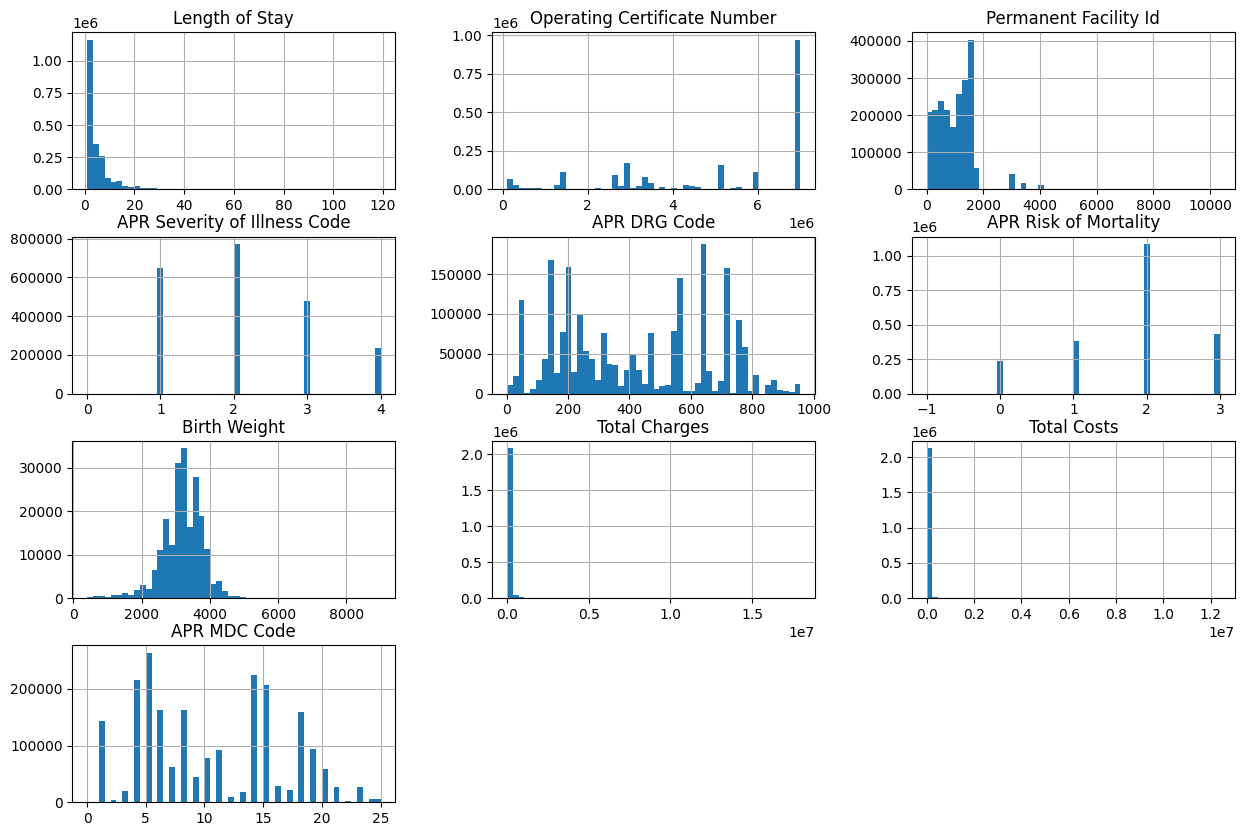

In [ ]:
numeric_columns = [
    'Length of Stay',
    'Operating Certificate Number',
    'Permanent Facility Id',
    'APR Severity of Illness Code',
    'APR DRG Code',
    'APR Risk of Mortality',
    'Birth Weight',
    'Total Charges',
    'Total Costs',
    'APR MDC Code'
]

# Create a copy of the dataset with only numeric columns
inpatient_data_numeric = inpatient_data[numeric_columns].copy()

# Convert APR Risk of Mortality to numeric if it's categorical
if inpatient_data_numeric['APR Risk of Mortality'].dtype == 'object':
    inpatient_data_numeric['APR Risk of Mortality'] = pd.Categorical(inpatient_data_numeric['APR Risk of Mortality']).codes

# Ensure all columns are numeric
for col in numeric_columns:
    inpatient_data_numeric[col] = pd.to_numeric(inpatient_data_numeric[col], errors='coerce')
inpatient_data_numeric.hist(bins=50, figsize=(15, 10)) # Want to see distributions of numeric data
plt.show()

These graphs help give an idea of what types of values different feature columns hold. For example, 'Birth Weight' shows a fairly normal distribution containing exactly as the header indicates, birthing weights. In contrast, 'APR Risk of Mortality' doesn't follow a distribution, but looks like buckets of data representing the risk of mortality. This is important information for the data cleaning phase in how we treat different features, even if they are numeric, or if they need to be altered for model training.

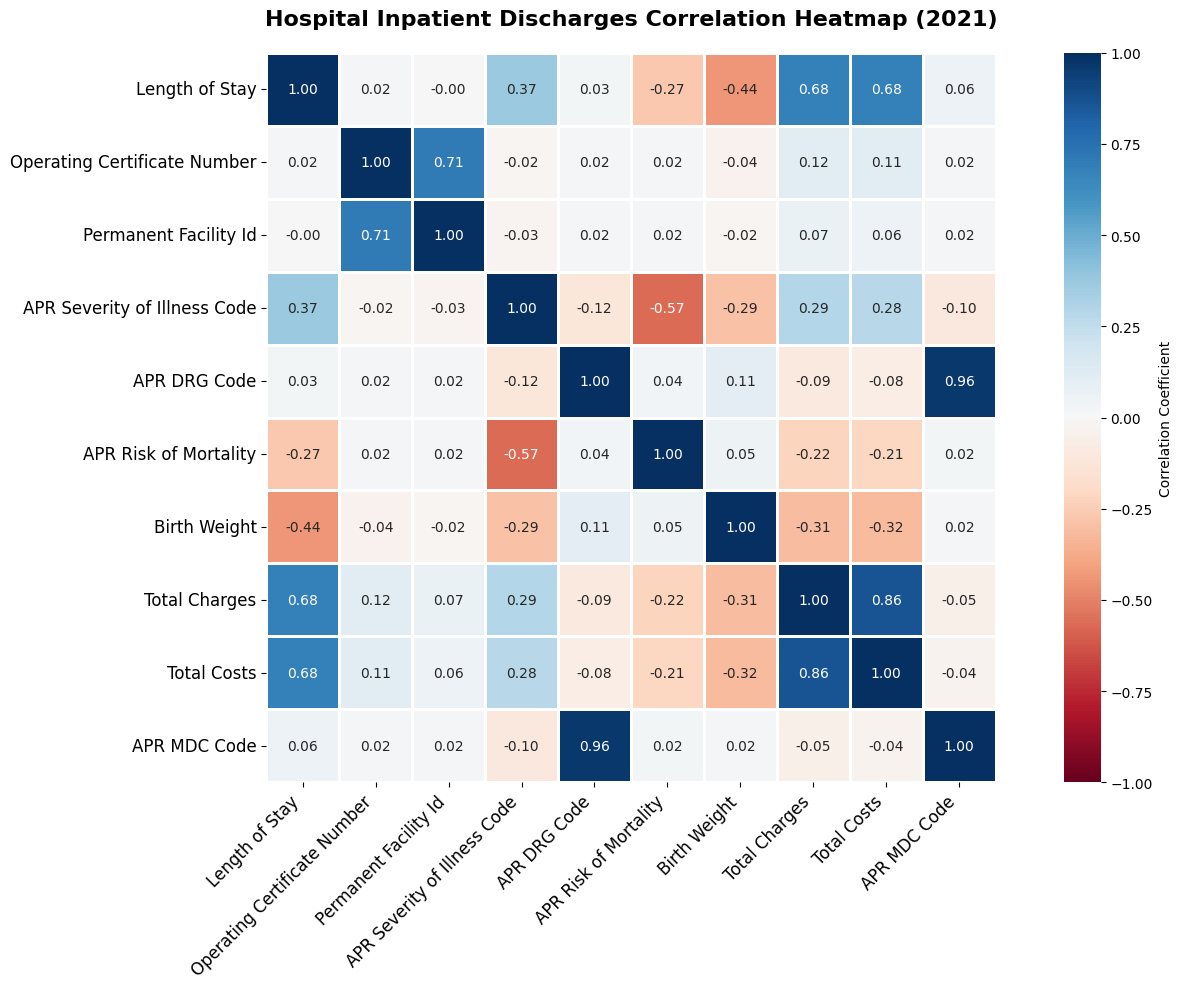

In [ ]:
# Create correlation matrix
correlation_matrix = inpatient_data_numeric.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(15, 10))

# Create heatmap with improved styling
sns.heatmap(correlation_matrix,
            annot=True,  # Show correlation values
            cmap='RdBu',  # Red-Blue diverging colormap for better contrast
            vmin=-1, vmax=1,  # Fix the range of correlations
            center=0,  # Center the colormap at 0
            square=True,  # Make cells square
            fmt='.2f',  # Format correlation values to 2 decimal places
            cbar_kws={'label': 'Correlation Coefficient'},  # Add colorbar label
            linewidths=1,  # Increased line width for better visibility
            annot_kws={'size': 10})  # Larger font size for correlation values

# Improve label readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add title with better formatting
plt.title('Hospital Inpatient Discharges Correlation Heatmap (2021)',
          pad=20,
          fontsize=16,
          fontweight='bold')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()


We can see some strong correlations between 'Length of Stay', 'Total Charges', and 'Total Costs'. Additionally, there are strong correlations between different codes like 'APR MDC Code' and 'APR DRG Code', or 'APR Risk of Mortality' and 'APR Severity of Illness Code'. Most of these strong correlations make sense, where if a patient is in the hosptial longer then the actual and projected costs will be higher. Similarly, higher chance of mortality or certain diagnoses will have closely followed codes.

### Data Cleaning

In [ ]:
def categorize_mdc(mdc_description): # Many columns, so wanted to condense it. Grouping decisions made from external research.
    if mdc_description in [
        'PREGNANCY, CHILDBIRTH AND THE PUERPERIUM',
        'NEWBORNS AND OTHER NEONATES WITH CONDITIONS ORIGINATING IN THE PERINATAL PERIOD',
        'DISEASES AND DISORDERS OF THE FEMALE REPRODUCTIVE SYSTEM',
        'DISEASES AND DISORDERS OF THE MALE REPRODUCTIVE SYSTEM']:
        return 'REPRODUCTIVE AND NEONATAL HEALTH'

    elif mdc_description in [
        'DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM',
        'DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM',
        'INFECTIOUS AND PARASITIC DISEASES (SYSTEMIC OR UNSPECIFIED SITES)',
        'HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS']:
        return 'CARDIORESPIRATORY AND INFECTIOUS DISEASES'

    elif mdc_description in [
        'DISEASES AND DISORDERS OF THE DIGESTIVE SYSTEM',
        'DISEASES AND DISORDERS OF THE KIDNEY AND URINARY TRACT',
        'ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES AND DISORDERS',
        'DISEASES AND DISORDERS OF THE HEPATOBILIARY SYSTEM AND PANCREAS']:
        return 'CHRONIC AND DIGESTIVE CONDITIONS'

    elif mdc_description in [
        'INJURIES, POISONINGS AND TOXIC EFFECTS OF DRUGS',
        'MULTIPLE SIGNIFICANT TRAUMA',
        'BURNS',
        'MYELOPROLIFERATIVE DISEASES AND DISORDERS, AND POORLY DIFFERENTIATED NEOPLASM',
        'FACTORS INFLUENCING HEALTH STATUS AND OTHER CONTACTS WITH HEALTH SERVICES']:
        return 'TRAUMA AND COMPLEX CONDITIONS'

    elif mdc_description in [
        'DISEASES AND DISORDERS OF THE NERVOUS SYSTEM',
        'MENTAL DISEASES AND DISORDERS',
        'ALCOHOL/DRUG USE AND ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS']:
        return 'MENTAL AND NEUROLOGICAL HEALTH'

    elif mdc_description in [
        'DISEASES AND DISORDERS OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE',
        'DISEASES AND DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE AND BREAST',
        'DISEASES AND DISORDERS OF THE BLOOD AND BLOOD FORMING ORGANS AND IMMUNOLOGICAL DISORDERS',
        'DISEASES AND DISORDERS OF THE EAR, NOSE, MOUTH AND THROAT',
        'DISEASES AND DISORDERS OF THE EYE',
        'PRE MDC']:
        return 'SPECIALIZED AND MISCELLANEOUS DISEASES'
    else:
        return 'Other'  # Handle other descriptions as needed

# Apply the function to create a new column 'MDC Category'
inpatient_data['MDC Category'] = inpatient_data['APR MDC Description'].apply(categorize_mdc)

# To see the updated DataFrame, run the following code:
inpatient_data.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,MDC Category
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,320922.43,60241.34,CARDIORESPIRATORY AND INFECTIOUS DISEASES
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,61665.22,9180.69,MENTAL AND NEUROLOGICAL HEALTH
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,42705.34,11366.50,REPRODUCTIVE AND NEONATAL HEALTH
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,72700.17,12111.75,CHRONIC AND DIGESTIVE CONDITIONS
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,55562.51,8339.72,MENTAL AND NEUROLOGICAL HEALTH


In [ ]:
# Drop columns not relevant to project goal
drop_cols = ['Hospital County', 'Operating Certificate Number', 'Permanent Facility Id', 'Discharge Year',
        'CCSR Diagnosis Code', 'CCSR Diagnosis Description', 'CCSR Procedure Code', 'CCSR Procedure Description', 'APR DRG Description',
             'Birth Weight', 'Facility Name','APR MDC Description', 'Emergency Department Indicator', 'Patient Disposition', 'Payment Typology 2',
             'Payment Typology 3', 'APR Severity of Illness Description', 'Zip Code - 3 digits', 'APR DRG Code', 'APR MDC Code']
inpatient_data = inpatient_data.drop(columns=drop_cols, errors='ignore')

# Bucket categorical variables

# Replace M with 0, F with 1, U with 2
inpatient_data['Gender'] = inpatient_data['Gender'].replace({'M': 0, 'F': 1, 'U': 2})

# Replace White with 0, Black/African American with 1, Other Race with 2, and Multi-racial with 3
inpatient_data['Race'] = inpatient_data['Race'].replace({'White': 0, 'Black/African American': 1, 'Other Race': 2, 'Multi-racial': 3})

# Replace 120+ with 120, convert column to integer
inpatient_data['Length of Stay'] = inpatient_data['Length of Stay'].replace({'120 +': 120})
inpatient_data['Length of Stay'] = pd.to_numeric(inpatient_data['Length of Stay'], errors='coerce')

# Replace Not Span/Hispanic with 0, Spanish/Hispanic with 1, Multi-ethnic with 2, and Unknown with 3
inpatient_data['Ethnicity'] = inpatient_data['Ethnicity'].replace({'Not Span/Hispanic': 0, 'Spanish/Hispanic': 1, 'Multi-ethnic': 2, 'Unknown': 3})

# Replace Medical with 0, Surgical with 1, and Not Applicable with 2
inpatient_data['APR Medical Surgical Description'] = inpatient_data['APR Medical Surgical Description'].replace({'Medical': 0, 'Surgical': 1, 'Not Applicable': 2})

# Replace Emergency with 0, Elective with 1, Newborn with 2, Urgent with 3, Trauma with 4, and Not Available with 5
inpatient_data['Type of Admission'] = inpatient_data['Type of Admission'].replace({'Emergency': 0, 'Elective': 1, 'Newborn': 2, 'Urgent': 3, 'Trauma': 4, 'Not Available': 5})

# Replace Medicare with 0, Medicaid with 1, Private Health Insurance with 2, Blue Cross/Blue Shield with 3,
  # Managed Care, Unspecified with 4, Self-Pay with 5, Miscellaneous/Other with 6, Federal/State/Local/VA with 7,
  # and Department of Corrections with 8
inpatient_data['Payment Typology 1'] = inpatient_data['Payment Typology 1'].replace({
    'Medicare': 0,
    'Medicaid': 1,
    'Private Health Insurance': 2,
    'Blue Cross/Blue Shield': 3,
    'Managed Care, Unspecified': 4,
    'Self-Pay': 5,
    'Miscellaneous/Other': 6,
    'Federal/State/Local/VA': 7,
    'Department of Corrections': 8
})

# Rename columns for clarity
inpatient_data = inpatient_data.rename(columns={
    'Total Costs': 'Estimated Total Costs',
    'Total Charges': 'Actual Total Costs',
    'Payment Typology 1': 'Payment Typology'})

# Check for changes
inpatient_data.head()

<ipython-input-7-1854cd8d15cd>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inpatient_data['Gender'] = inpatient_data['Gender'].replace({'M': 0, 'F': 1, 'U': 2})
<ipython-input-7-1854cd8d15cd>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inpatient_data['Race'] = inpatient_data['Race'].replace({'White': 0, 'Black/African American': 1, 'Other Race': 2, 'Multi-racial': 3})
<ipython-input-7-1854cd8d15cd>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

,Hospital Service Area,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,APR Severity of Illness Code,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology,Actual Total Costs,Estimated Total Costs,MDC Category
0,New York City,70 or Older,0,2,1,27,0,3,Extreme,0,0,320922.43,60241.34,CARDIORESPIRATORY AND INFECTIOUS DISEASES
1,New York City,50 to 69,1,0,0,4,0,2,Minor,0,2,61665.22,9180.69,MENTAL AND NEUROLOGICAL HEALTH
2,New York City,18 to 29,1,2,1,2,0,1,Minor,1,1,42705.34,11366.50,REPRODUCTIVE AND NEONATAL HEALTH
3,New York City,70 or Older,0,2,1,5,0,3,Major,0,0,72700.17,12111.75,CHRONIC AND DIGESTIVE CONDITIONS
4,New York City,50 to 69,1,1,0,3,0,2,Minor,0,0,55562.51,8339.72,MENTAL AND NEUROLOGICAL HEALTH


In [ ]:
inpatient_data.info() # Check for correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135260 entries, 0 to 2135259
Data columns (total 14 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Hospital Service Area             object 
 1   Age Group                         object 
 2   Gender                            int64  
 3   Race                              int64  
 4   Ethnicity                         int64  
 5   Length of Stay                    int64  
 6   Type of Admission                 int64  
 7   APR Severity of Illness Code      int64  
 8   APR Risk of Mortality             object 
 9   APR Medical Surgical Description  int64  
 10  Payment Typology                  int64  
 11  Actual Total Costs                float64
 12  Estimated Total Costs             float64
 13  MDC Category                      object 
dtypes: float64(2), int64(8), object(4)
memory usage: 228.1+ MB


In [ ]:
# Convert columns to categorical since these columns are categories.

columns_to_convert_cat = ['MDC Category','Hospital Service Area','Age Group','Gender', 'Race', 'Ethnicity', 'Type of Admission','APR Severity of Illness Code','APR Medical Surgical Description','APR Risk of Mortality','Payment Typology']

inpatient_data[columns_to_convert_cat] = inpatient_data[columns_to_convert_cat].astype('category')



In [ ]:
inpatient_data.info() # Check if changed to category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135260 entries, 0 to 2135259
Data columns (total 14 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   Hospital Service Area             category
 1   Age Group                         category
 2   Gender                            category
 3   Race                              category
 4   Ethnicity                         category
 5   Length of Stay                    int64   
 6   Type of Admission                 category
 7   APR Severity of Illness Code      category
 8   APR Risk of Mortality             category
 9   APR Medical Surgical Description  category
 10  Payment Typology                  category
 11  Actual Total Costs                float64 
 12  Estimated Total Costs             float64 
 13  MDC Category                      category
dtypes: category(11), float64(2), int64(1)
memory usage: 71.3 MB


In [ ]:
# Check for missing values in each column
print("Missing values in each column:")
print(inpatient_data.isnull().sum())

Missing values in each column:
Hospital Service Area               5214
Age Group                              0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
APR Severity of Illness Code           0
APR Risk of Mortality                589
APR Medical Surgical Description       0
Payment Typology                       0
Actual Total Costs                     0
Estimated Total Costs                  0
MDC Category                           0
dtype: int64


In [ ]:
inpatient_data = inpatient_data.dropna(subset=[ "APR Risk of Mortality","Hospital Service Area"])
print("Remaining missing values:")
print(inpatient_data[["APR Risk of Mortality","Hospital Service Area"]].isnull().sum())


Remaining missing values:
APR Risk of Mortality    0
Hospital Service Area    0
dtype: int64


In [ ]:
inpatient_data[['Hospital Service Area']].head(20)
print(inpatient_data.isnull().sum())

Hospital Service Area               0
Age Group                           0
Gender                              0
Race                                0
Ethnicity                           0
Length of Stay                      0
Type of Admission                   0
APR Severity of Illness Code        0
APR Risk of Mortality               0
APR Medical Surgical Description    0
Payment Typology                    0
Actual Total Costs                  0
Estimated Total Costs               0
MDC Category                        0
dtype: int64


## Create a Test Set

Before doing much more, we're setting aside testing data. All our modeling fitting, tuning, and selection are going to be based on the training data. In the end, before deploying, we'll estimate the generalization error on this test data.

In [ ]:
from sklearn.model_selection import train_test_split
random_state = 42
np.random.seed(random_state)

X = inpatient_data.drop("Actual Total Costs", axis=1) # Want to predict Actual Total Costs
y = inpatient_data["Actual Total Costs"].copy() # In case we modify values in y and don't want to affect original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

# Prepare Data Processing for Machine Learning

In [ ]:
X_train_copy = X_train.copy(); # Experiment on a copy of the training data
y_train_copy = y_train.copy();

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1597096, 13)
(1597096,)


## Minor Adjustments

In [ ]:
# How many distinct values are there for each column?
for column in inpatient_data.select_dtypes(include=['category']):
    num_distinct = inpatient_data[column].nunique()
    print(f"Column '{column}': {num_distinct} distinct values")

    # Change 120+ to 120 (everything after will just bucket to 120)
    # Helps with maintaining data types and managing data for models



Column 'Hospital Service Area': 8 distinct values
Column 'Age Group': 5 distinct values
Column 'Gender': 3 distinct values
Column 'Race': 4 distinct values
Column 'Ethnicity': 4 distinct values
Column 'Type of Admission': 6 distinct values
Column 'APR Severity of Illness Code': 4 distinct values
Column 'APR Risk of Mortality': 4 distinct values
Column 'APR Medical Surgical Description': 2 distinct values
Column 'Payment Typology': 9 distinct values
Column 'MDC Category': 6 distinct values


## Transformation and Preprocessing Pipelines

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import sklearn as set_config


## TRANSFORMATIONS

# Set_config(display='diagram')
# Custom transformer for cost-related ratios
class CostRatioTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Calculate cost per day ratio
        #cost_per_day = X[:, 1] / X[:, 0].astype(float)
        cost_per_day = X[:, 1].astype(float) / X[:, 0].astype(float) # Estimated Total Costs / Length of Stay
        return cost_per_day.reshape(-1, 1)

    def get_feature_names_out(self, names=None):
        return ['cost_per_day']


cat_pipeline_basic = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# Numeric pipeline for financial data
numeric_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

# Cost ratio pipeline
cost_ratio_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    CostRatioTransformer(),
    StandardScaler()
)

## MAIN PREPROCESSING PIPELINE

preprocessing = ColumnTransformer([
    # Categorical features with low cardinality
    ("basic_cat", cat_pipeline_basic, [
        "Gender", "Age Group", "Type of Admission",
        "APR Medical Surgical Description"
    ]),

    # Categorical features that might need special handling - LOOK AT
    ("payment_cat", cat_pipeline_basic, [
        "Payment Typology"
    ]),

    # Clinical categorical features
    ("clinical_cat", cat_pipeline_basic, [
        "APR Risk of Mortality"
    ]),

    # Demographic categorical features
    ("demographic_cat", cat_pipeline_basic, [
        "Race", "Ethnicity"
    ]),

    # Cost ratio calculation
    ("cost_ratio", cost_ratio_pipeline, ["Length of Stay", "Estimated Total Costs"]),


    # Medical codes (converted to numeric)
    ("medical_codes", numeric_pipeline, [
        "APR Severity of Illness Code"
    ])
], remainder='drop')  # Drop any remaining columns not explicitly specified

# Show preprocessing pipeline with transformations
preprocessing

ColumnTransformer(transformers=[('basic_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'Age Group', 'Type of Admission',
                                  'APR Medical Surgical Description']),
                                ('payment_cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehoten...
                                ('cost_ratio',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('costratiotransformer',
                                                  CostRatioTransformer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Length of Stay', 'Estimated Total Costs']),
                                ('medical_codes',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['APR Severity of Illness Code'])])

## Recursive Feature Elimination

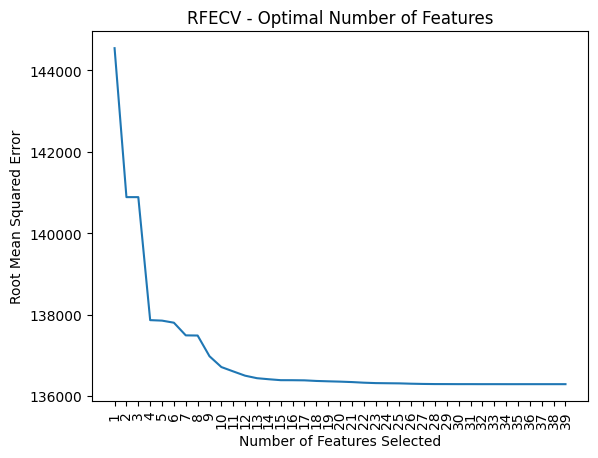

Optimal number of features: 34
RMSE at optimal number of features: 136290.94
                                          Feature  Selected
0                             basic_cat__Gender_0      True
1                             basic_cat__Gender_1     False
2                             basic_cat__Gender_2     False
3                    basic_cat__Age Group_0 to 17      True
4                   basic_cat__Age Group_18 to 29      True
5                   basic_cat__Age Group_30 to 49      True
6                   basic_cat__Age Group_50 to 69     False
7                basic_cat__Age Group_70 or Older      True
8                  basic_cat__Type of Admission_0      True
9                  basic_cat__Type of Admission_1      True
10                 basic_cat__Type of Admission_2      True
11                 basic_cat__Type of Admission_3      True
12                 basic_cat__Type of Admission_4      True
13                 basic_cat__Type of Admission_5      True
14  basic_cat__APR Medi

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

rfecv = RFECV(LinearRegression(), scoring='neg_root_mean_squared_error')
  # So we can access some results easily to examine

rfecv_pipe = Pipeline([
    ('prep', preprocessing),
    ('select', rfecv),
    # ('model', LinearRegression()) # uncomment/replace model to fit with the selected features
])

rfecv_pipe.fit(X_train, y_train)
rfecv_pipe.fit(X_test, y_test)


plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("Root Mean Squared Error")
rmses = -rfecv.cv_results_['mean_test_score']
n_features = rfecv.cv_results_['n_features']
plt.plot(n_features, rmses)
plt.xticks(n_features, rotation=90)
plt.show()

optimal_num_features = rfecv.n_features_
optimal_rmse = -rfecv.cv_results_['mean_test_score'][optimal_num_features - 1]
print(f"Optimal number of features: {optimal_num_features}")
print(f"RMSE at optimal number of features: {optimal_rmse:.2f}")

# Get all feature names from the preprocessing pipeline
all_features = rfecv_pipe['prep'].get_feature_names_out()

# Create a DataFrame to store feature names and selection status
feature_selection_df = pd.DataFrame({'Feature': all_features, 'Selected': rfecv.support_})

# Print the DataFrame
print(feature_selection_df)


In [ ]:
# Caputred fit transform in a new variable, will only have the features because of the transform
# It removes the non-selected features from the output above

X_train_transform = rfecv_pipe.transform(X_train)
X_test_transform = rfecv_pipe.transform(X_test)

In [ ]:
# Used ChatGPT to help convert sparse matrix to a DataFrame
X_train_dense = X_train_transform.toarray()  # Convert sparse matrix to dense array

# Create a DataFrame from the dense numpy array
X_train_transform_df = pd.DataFrame(X_train_dense, columns=all_features[rfecv.support_])

X_test_dense = X_test_transform.toarray()
X_test_transform_df = pd.DataFrame(X_test_dense, columns=all_features[rfecv.support_])

In [ ]:
X_train_transform_df.head() # Check new DataFrame with selected features

,basic_cat__Gender_0,basic_cat__Age Group_0 to 17,basic_cat__Age Group_18 to 29,basic_cat__Age Group_30 to 49,basic_cat__Age Group_70 or Older,basic_cat__Type of Admission_0,basic_cat__Type of Admission_1,basic_cat__Type of Admission_2,basic_cat__Type of Admission_3,basic_cat__Type of Admission_4,...,clinical_cat__APR Risk of Mortality_Moderate,demographic_cat__Race_0,demographic_cat__Race_1,demographic_cat__Race_2,demographic_cat__Ethnicity_0,demographic_cat__Ethnicity_1,demographic_cat__Ethnicity_2,demographic_cat__Ethnicity_3,cost_ratio__cost_per_day,medical_codes__APR Severity of Illness Code
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.529924,1.904288
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.393084,0.879250
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.699923,0.879250
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.295149,-1.170827
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.345317,-1.170827


In [ ]:
X_train_transform_df.columns

Index(['basic_cat__Gender_0', 'basic_cat__Age Group_0 to 17',
       'basic_cat__Age Group_18 to 29', 'basic_cat__Age Group_30 to 49',
       'basic_cat__Age Group_70 or Older', 'basic_cat__Type of Admission_0',
       'basic_cat__Type of Admission_1', 'basic_cat__Type of Admission_2',
       'basic_cat__Type of Admission_3', 'basic_cat__Type of Admission_4',
       'basic_cat__Type of Admission_5',
       'basic_cat__APR Medical Surgical Description_0',
       'basic_cat__APR Medical Surgical Description_1',
       'payment_cat__Payment Typology_0', 'payment_cat__Payment Typology_1',
       'payment_cat__Payment Typology_2', 'payment_cat__Payment Typology_4',
       'payment_cat__Payment Typology_5', 'payment_cat__Payment Typology_6',
       'payment_cat__Payment Typology_7', 'payment_cat__Payment Typology_8',
       'clinical_cat__APR Risk of Mortality_Extreme',
       'clinical_cat__APR Risk of Mortality_Major',
       'clinical_cat__APR Risk of Mortality_Minor',
       'clinical_ca

In [ ]:
 # Was getting a datatype error so converted data type for models below just in case
X_train_transform_df['cost_ratio__cost_per_day'] = X_train_transform_df['cost_ratio__cost_per_day'].astype(float)
X_test_transform_df['cost_ratio__cost_per_day'] = X_test_transform_df['cost_ratio__cost_per_day'].astype(float)

# Select and Train a Model

## Linear Regression

In [ ]:
from sklearn import set_config
import sklearn
from sklearn.linear_model import LinearRegression

# Set display configuration to show diagrams
set_config(display='diagram')

# Create and display the pipeline
lr_pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([
        # Basic categorical features
        ("basic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['basic_cat__Gender_0', 'basic_cat__Age Group_0 to 17',
            'basic_cat__Age Group_18 to 29', 'basic_cat__Age Group_30 to 49',
            'basic_cat__Age Group_70 or Older', 'basic_cat__Type of Admission_0',
            'basic_cat__Type of Admission_1', 'basic_cat__Type of Admission_2',
            'basic_cat__Type of Admission_3','basic_cat__Type of Admission_4', 'basic_cat__Type of Admission_5',
            'basic_cat__APR Medical Surgical Description_0',
            'basic_cat__APR Medical Surgical Description_1']),

        # Payment categories
        ("payment_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['payment_cat__Payment Typology_0', 'payment_cat__Payment Typology_1',
            'payment_cat__Payment Typology_2', 'payment_cat__Payment Typology_4',
            'payment_cat__Payment Typology_5', 'payment_cat__Payment Typology_6',
            'payment_cat__Payment Typology_7', 'payment_cat__Payment Typology_8']),

        # Clinical categories
        ("clinical_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['clinical_cat__APR Risk of Mortality_Extreme', 'clinical_cat__APR Risk of Mortality_Major',
            'clinical_cat__APR Risk of Mortality_Minor', 'clinical_cat__APR Risk of Mortality_Moderate']),

        # Demographic categories
        ("demographic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent",),
            OneHotEncoder(handle_unknown="ignore")
        ), ['demographic_cat__Race_0', 'demographic_cat__Race_1', 'demographic_cat__Race_2',
            'demographic_cat__Ethnicity_0','demographic_cat__Ethnicity_1', 'demographic_cat__Ethnicity_2',
            'demographic_cat__Ethnicity_3']),

        # Cost ratio (already processed in preprocessing pipeline)
        ("cost_ratio", make_pipeline(
            StandardScaler()
        ), ["cost_ratio__cost_per_day"]),

        # Medical codes
        ("medical_codes", make_pipeline(
            SimpleImputer(strategy="median"),
            StandardScaler()
        ), ["medical_codes__APR Severity of Illness Code"])
    ], remainder='drop')),

      # Linear Regression model
    ("lr", LinearRegression()),
])

# Display the pipeline
lr_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('basic_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['basic_cat__Gender_0',
                                                   'basic_cat__Age Group_0 to '
                                                   '17',
                                                   'basic_cat__Age Group_18 to '
                                                   '29',
                                                   'basic_cat__Age Group_30 to '
                                                   '49',
                                                   'basic_cat__Age Group_70 or...
                                                   'demographic_cat__Ethnicity_2',
                                                   'demographic_cat__Ethnicity_3']),
                                                 ('cost_ratio',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cost_ratio__cost_per_day']),
                                                 ('medical_codes',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['medical_codes__APR '
                                                   'Severity of Illness '
                                                   'Code'])])),
                ('lr', LinearRegression())])

## Random Forest Regression

In [ ]:
from sklearn import set_config
import sklearn
from sklearn.ensemble import RandomForestRegressor

# Set display configuration to show diagrams
set_config(display='diagram')

# Create and display the pipeline
rf_pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([
        # Basic categorical features
        ("basic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['basic_cat__Gender_0', 'basic_cat__Age Group_0 to 17',
            'basic_cat__Age Group_18 to 29', 'basic_cat__Age Group_30 to 49',
            'basic_cat__Age Group_70 or Older', 'basic_cat__Type of Admission_0',
            'basic_cat__Type of Admission_1', 'basic_cat__Type of Admission_2',
            'basic_cat__Type of Admission_3','basic_cat__Type of Admission_4', 'basic_cat__Type of Admission_5',
            'basic_cat__APR Medical Surgical Description_0',
            'basic_cat__APR Medical Surgical Description_1']),

        # Payment categories
        ("payment_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['payment_cat__Payment Typology_0', 'payment_cat__Payment Typology_1',
            'payment_cat__Payment Typology_2', 'payment_cat__Payment Typology_4',
            'payment_cat__Payment Typology_5', 'payment_cat__Payment Typology_6',
            'payment_cat__Payment Typology_7', 'payment_cat__Payment Typology_8']),

        # Clinical categories
        ("clinical_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['clinical_cat__APR Risk of Mortality_Extreme', 'clinical_cat__APR Risk of Mortality_Major',
            'clinical_cat__APR Risk of Mortality_Minor', 'clinical_cat__APR Risk of Mortality_Moderate']),

        # Demographic categories
        ("demographic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent",),
            OneHotEncoder(handle_unknown="ignore")
        ), ['demographic_cat__Race_0', 'demographic_cat__Race_1', 'demographic_cat__Race_2',
            'demographic_cat__Ethnicity_0','demographic_cat__Ethnicity_1', 'demographic_cat__Ethnicity_2',
            'demographic_cat__Ethnicity_3']),

         # Cost ratio (already processed in preprocessing pipeline)
        ("cost_ratio", make_pipeline(
            StandardScaler()
        ), ["cost_ratio__cost_per_day"]),

        # Medical codes
        ("medical_codes", make_pipeline(
            SimpleImputer(strategy="median"),
            StandardScaler()
        ), ["medical_codes__APR Severity of Illness Code"])
    ], remainder='drop')),

      # Random Forest Regressoion model
    ("rf", RandomForestRegressor(n_estimators=10)),  # Can adjust later but needed to add because it was taking too long (too many trees)
])

# Display the pipeline
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('basic_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['basic_cat__Gender_0',
                                                   'basic_cat__Age Group_0 to '
                                                   '17',
                                                   'basic_cat__Age Group_18 to '
                                                   '29',
                                                   'basic_cat__Age Group_30 to '
                                                   '49',
                                                   'basic_cat__Age Group_70 or...
                                                   'demographic_cat__Ethnicity_3']),
                                                 ('cost_ratio',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cost_ratio__cost_per_day']),
                                                 ('medical_codes',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['medical_codes__APR '
                                                   'Severity of Illness '
                                                   'Code'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

## Decision Tree Regression

In [ ]:
from sklearn import set_config
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Set display configuration to show diagrams
set_config(display='diagram')

# Create and display the pipeline
dt_pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([
        # Basic categorical features
        ("basic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['basic_cat__Gender_0', 'basic_cat__Age Group_0 to 17',
            'basic_cat__Age Group_18 to 29', 'basic_cat__Age Group_30 to 49',
            'basic_cat__Age Group_70 or Older', 'basic_cat__Type of Admission_0',
            'basic_cat__Type of Admission_1', 'basic_cat__Type of Admission_2',
            'basic_cat__Type of Admission_3','basic_cat__Type of Admission_4', 'basic_cat__Type of Admission_5',
            'basic_cat__APR Medical Surgical Description_0',
            'basic_cat__APR Medical Surgical Description_1']),

        # Payment categories
        ("payment_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['payment_cat__Payment Typology_0', 'payment_cat__Payment Typology_1',
            'payment_cat__Payment Typology_2', 'payment_cat__Payment Typology_4',
            'payment_cat__Payment Typology_5', 'payment_cat__Payment Typology_6',
            'payment_cat__Payment Typology_7', 'payment_cat__Payment Typology_8']),

        # Clinical categories
        ("clinical_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['clinical_cat__APR Risk of Mortality_Extreme', 'clinical_cat__APR Risk of Mortality_Major',
            'clinical_cat__APR Risk of Mortality_Minor', 'clinical_cat__APR Risk of Mortality_Moderate']),

        # Demographic categories
        ("demographic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent",),
            OneHotEncoder(handle_unknown="ignore")
        ), ['demographic_cat__Race_0', 'demographic_cat__Race_1', 'demographic_cat__Race_2',
            'demographic_cat__Ethnicity_0','demographic_cat__Ethnicity_1', 'demographic_cat__Ethnicity_2',
            'demographic_cat__Ethnicity_3']),

         # Cost ratio (already processed in preprocessing pipeline)
        ("cost_ratio", make_pipeline(
            StandardScaler()
        ), ["cost_ratio__cost_per_day"]),

        # Medical codes
        ("medical_codes", make_pipeline(
            SimpleImputer(strategy="median"),
            StandardScaler()
        ), ["medical_codes__APR Severity of Illness Code"])
    ], remainder='drop')),

      # Decision Tree Regression model
    ("dt", DecisionTreeRegressor()),
])

# Display the pipeline
dt_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('basic_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['basic_cat__Gender_0',
                                                   'basic_cat__Age Group_0 to '
                                                   '17',
                                                   'basic_cat__Age Group_18 to '
                                                   '29',
                                                   'basic_cat__Age Group_30 to '
                                                   '49',
                                                   'basic_cat__Age Group_70 or...
                                                   'demographic_cat__Ethnicity_2',
                                                   'demographic_cat__Ethnicity_3']),
                                                 ('cost_ratio',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['cost_ratio__cost_per_day']),
                                                 ('medical_codes',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['medical_codes__APR '
                                                   'Severity of Illness '
                                                   'Code'])])),
                ('dt', DecisionTreeRegressor())])

## XGBoost Regression

In [ ]:
from sklearn import set_config
import sklearn
import xgboost as xgb

# Set display configuration to show diagrams
set_config(display='diagram')

# Create and display the pipeline
xgb_pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([
        # Basic categorical features
        ("basic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['basic_cat__Gender_0', 'basic_cat__Age Group_0 to 17',
            'basic_cat__Age Group_18 to 29', 'basic_cat__Age Group_30 to 49',
            'basic_cat__Age Group_70 or Older', 'basic_cat__Type of Admission_0',
            'basic_cat__Type of Admission_1', 'basic_cat__Type of Admission_2',
            'basic_cat__Type of Admission_3','basic_cat__Type of Admission_4', 'basic_cat__Type of Admission_5',
            'basic_cat__APR Medical Surgical Description_0',
            'basic_cat__APR Medical Surgical Description_1']),

        # Payment categories
        ("payment_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['payment_cat__Payment Typology_0', 'payment_cat__Payment Typology_1',
            'payment_cat__Payment Typology_2', 'payment_cat__Payment Typology_4',
            'payment_cat__Payment Typology_5', 'payment_cat__Payment Typology_6',
            'payment_cat__Payment Typology_7', 'payment_cat__Payment Typology_8']),

        # Clinical categories
        ("clinical_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent"),
            OneHotEncoder(handle_unknown="ignore")
        ), ['clinical_cat__APR Risk of Mortality_Extreme', 'clinical_cat__APR Risk of Mortality_Major',
            'clinical_cat__APR Risk of Mortality_Minor', 'clinical_cat__APR Risk of Mortality_Moderate']),

        # Demographic categories
        ("demographic_cat", make_pipeline(
            SimpleImputer(strategy="most_frequent",),
            OneHotEncoder(handle_unknown="ignore")
        ), ['demographic_cat__Race_0', 'demographic_cat__Race_1', 'demographic_cat__Race_2',
            'demographic_cat__Ethnicity_0','demographic_cat__Ethnicity_1', 'demographic_cat__Ethnicity_2',
            'demographic_cat__Ethnicity_3']),

         # Cost ratio (already processed in preprocessing pipeline)
        ("cost_ratio", make_pipeline(
            StandardScaler()
        ), ["cost_ratio__cost_per_day"]),

        # Medical codes
        ("medical_codes", make_pipeline(
            SimpleImputer(strategy="median"),
            StandardScaler()
        ), ["medical_codes__APR Severity of Illness Code"])
    ], remainder='drop')),

      # XGBoost Regressor
    ("xgb", xgb.XGBRegressor()),
])

# Display the pipeline
xgb_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('basic_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['basic_cat__Gender_0',
                                                   'basic_cat__Age Group_0 to '
                                                   '17',
                                                   'basic_cat__Age Group_18 to '
                                                   '29',
                                                   'basic_cat__Age Group_30 to '
                                                   '49',
                                                   'basic_cat__Age Group_70 or...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
from sklearn.model_selection import cross_val_score

# Linear Regression
lr_cv_r2 = cross_val_score(lr_pipeline, X_train_transform_df, y_train, scoring="r2", cv=3)
print(f"Average Linear Regression Cross-Validation R^2: {lr_cv_r2.mean():.2f}")

# Random Forest Regression
rf_cv_r2 = cross_val_score(rf_pipeline, X_train_transform_df, y_train, scoring="r2", cv=3)
print(f"Average Random Forest Regression Cross-Validation R^2: {rf_cv_r2.mean():.2f}")

# Decision Tree Regression
dt_cv_r2 = cross_val_score(dt_pipeline, X_train_transform_df, y_train, scoring="r2", cv=3)
print(f"Average Decision Tree Regression Cross-Validation R^2: {dt_cv_r2.mean():.2f}")

# XGBoost Regression
xgb_cv_r2 = cross_val_score(xgb_pipeline, X_train_transform_df, y_train, scoring="r2", cv=3)
print(f"Average XGBoost Regressor Cross-Validation R^2: {xgb_cv_r2.mean():.2f}")


## Preliminary Evaluation Using Cross-Validation

Warning: this cell will take roughly 20 minutes to run since it's doing cross validation for all 4 models!

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error


lr_cv_rmses = -cross_val_score(lr_pipeline, X_train_transform_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Linear Regression Cross-Validation RMSE: {lr_cv_rmses.mean():.0f}")

rf_cv_rmses = -cross_val_score(rf_pipeline, X_train_transform_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Random Forest Regression Cross-Validation RMSE: {rf_cv_rmses.mean():.0f}")

dt_cv_rmses = -cross_val_score(dt_pipeline, X_train_transform_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Decision Tree Regression Cross-Validation RMSE: {dt_cv_rmses.mean():.0f}")

xgb_cv_rmses = -cross_val_score(xgb_pipeline, X_train_transform_df, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print(f"Average XGBoost Regressor Cross-Validation RMSE: {xgb_cv_rmses.mean():.0f}")

Average Linear Regression Cross-Validation RMSE: 135390
Average Random Forest Regression Cross-Validation RMSE: 134267
Average Decision Tree Regression Cross-Validation RMSE: 172158
Average XGBoost Regressor Cross-Validation RMSE: 120971


### **Discussion of Model Results**

XGBoost regression had the lowest RMSE value of 120,971, which is signifcantly better the others. This model can be used to proceed with hyperparameter tuning.

# Fine-Tune Selected Model

### Hyperparameter Dictionary

* n_estimators = specifies the number of trees

* max_depth = controls the maximum depth of each tree

* learning_rate = determines how much the contribution of each tree is scaled before being added

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgb__n_estimators': [25, 35,45],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.01, 0.1],
}

grid_search = GridSearchCV(xgb_pipeline, param_grid, scoring='neg_mean_squared_error',  cv=3)

grid_search.fit(X_train_transform_df, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE (Negative):", grid_search.best_score_)

cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 45}
Best RMSE (Negative): -14606383753.97347


,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,mean_test_score
11,0.10,5,45,-1.460638e+10
10,0.10,5,35,-1.467125e+10
9,0.10,5,25,-1.483361e+10
8,0.10,3,45,-1.529638e+10
7,0.10,3,35,-1.548423e+10
6,0.10,3,25,-1.580118e+10
5,0.01,5,45,-1.817445e+10
4,0.01,5,35,-1.877456e+10
2,0.01,3,45,-1.897085e+10
1,0.01,3,35,-1.945162e+10


## Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={'xgb__n_estimators':randint(1,51),
    'xgb__max_depth':randint(2,8),
    'xgb__learning_rate':[0.01, 0.1, 0.2]}


rnd_search = RandomizedSearchCV(xgb_pipeline, param_distribs, n_iter=10, cv=3,
                                scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(X_train_transform_df, y_train)

print("Best Parameters:", rnd_search.best_params_)
print("Best RMSE (Negative):", rnd_search.best_score_)

rnd_res = pd.DataFrame(rnd_search.cv_results_)
rnd_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rnd_res.filter(regex = '(^param_|mean_test_score)', axis=1)

Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 44}
Best RMSE (Negative): -120592.39004253382


,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,mean_test_score
9,0.10,7,44,-120592.390043
0,0.20,5,29,-120749.903090
4,0.20,4,24,-121651.248324
3,0.10,4,23,-123492.937960
1,0.20,4,8,-124891.437918
6,0.20,7,2,-133821.895918
2,0.01,6,39,-135470.893876
5,0.01,5,40,-135863.225633
7,0.10,7,2,-140197.251112
8,0.01,2,12,-145524.137654


## Bayesian Search

The team chose to conduct a Bayesian Search instead of Halving Search to prevent overlooking hyperparameters that were prematurely eliminated.

In [ ]:
pip install scikit-optimize  # Install package for Bayesian Search

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

param_distribs = {
    'xgb__n_estimators': Integer(1, 51),
    'xgb__max_depth': Integer(2, 8),
    'xgb__learning_rate': Categorical([0.01, 0.1, 0.2])  # Used ChatGPT because wouldn't run with using categorical options
}


bayes_search = BayesSearchCV(xgb_pipeline, param_distribs, n_iter=10, cv=3,
                             optimizer_kwargs={'n_initial_points':10}, # From Lab 7
                             # By default it selects 10 initial points at random and the rest per bayesian optimization
                             # Want to make it explicit
                             scoring='neg_root_mean_squared_error', random_state=42)


bayes_search.fit(X_train_transform_df, y_train)

print("Best Parameters:", bayes_search.best_params_)
print("Best RMSE (Negative):", bayes_search.best_score_)

bayes_res = pd.DataFrame(bayes_search.cv_results_)
bayes_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
bayes_res.filter(regex = '(^param_|mean_test_score)', axis=1)


Best Parameters: OrderedDict([('xgb__learning_rate', 0.2), ('xgb__max_depth', 6), ('xgb__n_estimators', 45)])
Best RMSE (Negative): -120360.5313446204


,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,mean_test_score
8,0.20,6,45,-120360.531345
0,0.10,6,48,-120450.344601
1,0.20,7,16,-120752.769526
4,0.20,5,27,-120765.632304
7,0.10,8,26,-120934.245079
5,0.20,8,9,-121633.900283
6,0.10,7,19,-121685.707053
3,0.20,3,31,-123372.873689
2,0.10,8,6,-129799.518048
9,0.01,7,38,-135231.575881


### **Discussion of Search Method Results**

The best values for the number of estimators are on the larger side around 44 or 45. The learning rate was also a bit on the larger side with values 0.10 and 0.20. Max depth varied by search method ranging from 5 to 7.

The *Bayesian Search* method resulted in the lowest RMSE of 120,360.

# Evaluate System on the Test Set


In [ ]:
final_model = bayes_search.best_estimator_
final_predictions = final_model.predict(X_test_transform_df)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(f'The RMSE of the selected model {final_rmse:.0f}.')

The RMSE of the selected model 121308.


### **Discussion of Testing Error Output**

While it is expected for the test error to be higher than the the training error, the team is pleased to see that it's only a slight increase of approximately 950.

# Challenges

Having a large dataset with many different data types and features, we encountered several challenges throughout the project. One major issue was the computational time required due to the large number of rows, which slowed preprocessing and model training. To address this, we condensed categorical variables into broader categories, reducing dimensionality and improving efficiency without losing important information. Another challenge was selecting starting values for model hyperparameters, as performance is sensitive to these values. We started with smaller baseline values and increased them, using cross-validation to find the best configurations. Additionally, choosing the appropriate regression model required testing and comparison to ensure we selected the one that best fits the data. Finally, categorical feature selection for the pipeline took significant time and effort as we analyzed and selected relevant features to ensure the pipeline performed effectively. These challenges emphasized the need to balance efficiency and accuracy when working with large, complex datasets.

# Conclusion

The team found that using an XGBoost Regression model with the following hyperparameter values will most accurately forecast cost associated with hosptial length of stay:

* n_estimators = 45

* learning_rate = 0.2

* max_depth = 6

With the addition more data, this model setup can be used to improve resource allocation by optimize budgeting, bed utilization, and healthcare planning.

# AI Disclosure Statement

In the development of this project, we utilized OpenAI’s ChatGPT to assist with debugging code, clarifying key concepts, and enhancing code functionality. Specifically, the AI provided support in the following areas:

* Converting sparse matrices into DataFrames.

* Assisting with category selection in data processing.

* Answering technical questions and explaining key concepts to ensure a deeper understanding of the implementation

All decisions regarding the use of AI were carefully considered, and the AI's suggestions were critically reviewed, validated, and integrated into the project by the team. All the code is our own or taken from one of the labs unless explicitly stated otherwise (i.e., handling the sparse matrix).The final implementation reflects our own understanding and effort in completing the project.